# Tutorial 8: Decision Trees
### Dr. Daugherity, PHYS 453 - Spring 2020

Decision trees are efficient, effective, "white box" classifier that are prone to overfitting.  Its time to grow some trees!

**REFERENCES**
* https://scikit-learn.org/stable/modules/tree.html#tree
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [190]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # for making palettes
from sklearn import tree
from sklearn import datasets  # for generating toy data

# Dr D's Golden Rule:
**ALWAYS TEST YOUR CODE IN CASES WHERE YOU KNOW THE RIGHT ANSWER!**

In [191]:
# The default colors in plot_tree are orange and blue, so I'll make some palettes to match
cmap_bold = ListedColormap(['tab:orange','tab:blue'])
cmap_light = ListedColormap(['bisque','lightsteelblue'])

Use the make_blobs function to quickly produce some blobs of 2 feature, 2 class data:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

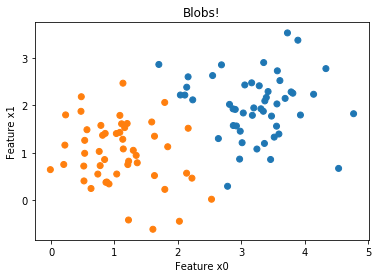

In [192]:
X_blob, y_blob = datasets.make_blobs(n_samples=100, centers=[[1,1],[3,2]], cluster_std=0.7, n_features=2, random_state=1)
                                     
plt.figure()
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=cmap_bold)
plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Blobs!")
plt.show()

# Depth Examples

We'll be doing this a _lot_, so begin by making a function that defines a complete grid of points, calls predict on each point, and plots the result to give us a nice decision boundary.  You will see this code in many sklearn examples.

In [193]:
def plot_decision(clf, X, cmap='image.cmap', h=0.2, margin=0.2):
    """Plots decision boundary of clf.  X is only used to find min/max range; h = grid size; margin = extra border padding"""
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

In [202]:
def make_tree_plots(depth):
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_blob, y_blob)
    tree.plot_tree(clf, filled=True, class_names=['orange','blue'])

    plt.subplot(1,2,2)
    plot_decision(clf,X_blob, cmap=cmap_light, h=0.02, margin=0.5)
    plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=cmap_bold)
    plt.xlabel("Feature x0")
    plt.ylabel("Feature x1")
    plt.title("Decision Boundary")

    plt.show()   

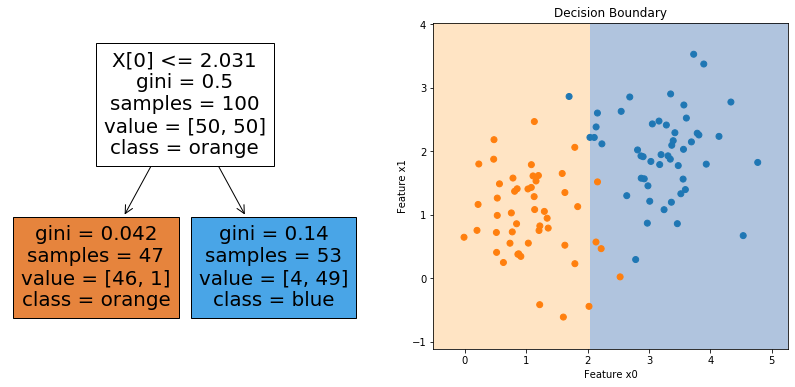

In [205]:
make_tree_plots(depth=1)

Take a moment and make sure you understand every detail of this diagram.  **The left branch is always yes!**

Check the missed points and make sure they match the tree.  Let's improve this by adding more layers

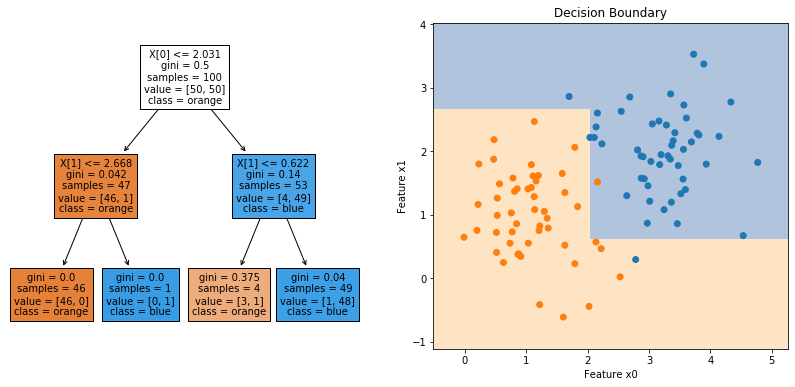

In [206]:
make_tree_plots(depth=2)

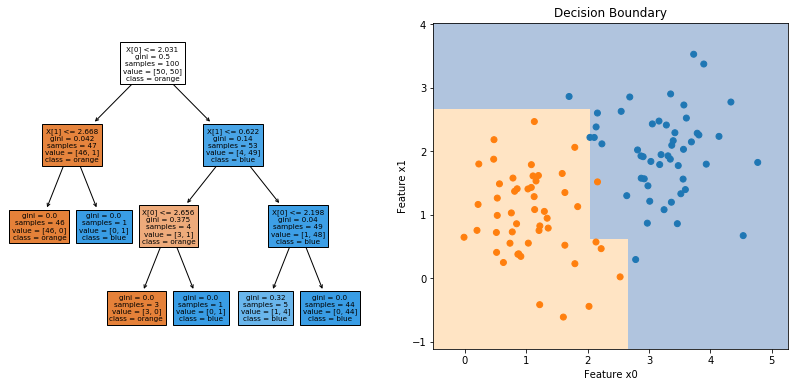

In [207]:
make_tree_plots(depth=3)

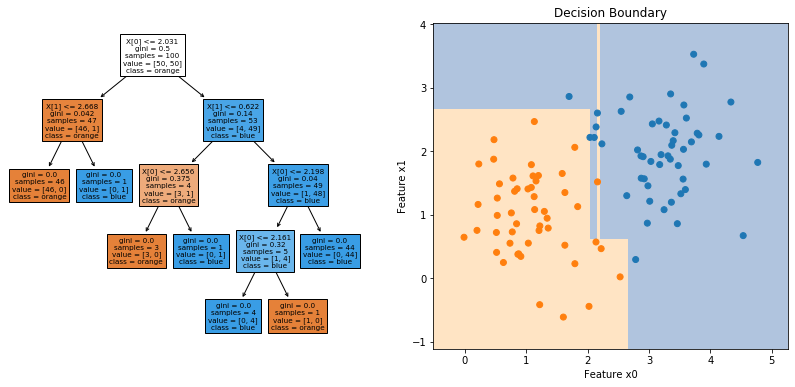

In [208]:
make_tree_plots(depth=4)